<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Acronimo_y_nombre_uc3m.png"/>

<img src="https://mirrors.creativecommons.org/presskit/buttons/88x31/png/by-nc-sa.png" width=15%/>
</center>    

# Cómo trabajar con datasets

En este notebook vamos a ver cómo podemos cargar un dataset almacenado en un csv. Para ello utilizaremos la librería Pandas.

También aprenderemos a construir gráficos que nos permitan visualizar facilmente ciertas propiedades del dataset, como por ejemplo, la distribución de sus clases o el tamaño medio de sus textos. 

## Cargar un dataset

Si trabajos con Google Colab, lo deseable es que nuestro dataset esté almacenado en alguna de las carpetas de google drive. Por tanto, lo primero que vamos a tener que hacer es montar el disco de google drive. 






Ejecuta la siguiente celda para montar tu disco de google drive. Durante el proceso tendrás que autorizar el acceso.


In [1]:
from google.colab import drive
# mount your google drive
drive.mount('/content/drive')

Mounted at /content/drive


También vamos a definir una variable que almacene la ruta al directorio en google drive donde almacenamos el dataset:

In [2]:
PATH = "/content/drive/My Drive/Colab Notebooks/data/corona/"

Afortunadamente, cada vez existen más datasets disponibles para tareas de PLN. 

Por ejemplo, Kaggle es una plataforma para científicos de datos donde se pueden crear distintas competiciones para avanzar en una determinada tarea. Además, Kaggle también se ha convertido en un  repositorio de datasets.  En el siguiente [link](#https://www.kaggle.com/datasets?search=text+classification), puedes ver una lista de los datasets más populares para la tarea de clasificación de textos. 


En nuestro caso, vamos a utilizar un dataset que consiste en una colección de tweets sobre Covid-19, que fueron anotados para la tarea de análisis de sentimiento (identificar el sentimiento de un determinado texto: positivo,  negativo o neutro). Dicho dataset se puede descargar desde el siguiente link [link](#https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification?resource=download).

El dataset contiene dos ficheros csv distintos, uno para la fase de entrenamiento y el segundo para la fase de evaluación. Por el momento, únicamente cargaremos el fichero de entrenamiento 'Corona_NLP_train.csv'. Para ello, usaremos la librería Pandas, que nos permite leer y cargar datos en una estructura de datos para su manipulación, y también nos permite escribir volcar nuestros datos a un fichero. 

In [3]:
import pandas as pd

df_train = pd.read_csv(PATH+"Corona_NLP_train.csv", encoding='latin-1') 
print('training dataset was loaded ', df_train.shape)

#show the first rows
df_train.head()

training dataset was loaded  (41157, 6)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


Mostramos algunos ejemplos:

In [4]:
# import random as rn
index = 36883
index= 14618    # example of extremely positive
index = 5005 # example of extremely negative
# index = rn.randint(0,df_train.shape[0])
# print(index)

record=df_train.iloc[index]
print(index, record['OriginalTweet'])
print('Label:', record['Sentiment'])





#Covid_19 #CoronavirusOutbreak
Label: Extremely Negative


Podemos ver que cada registro del dataset tiene los siguientes campos: UserName, ScreenName, Location, TweetAt, OriginalTweet, Sentiment.

En realidad, para la tarea de análisis de sentimiento simplemente necesitamos trabajar con el texto del tweet y con su sentimiento correspondiente. Podemos ignorar el resto de los campos.

In [5]:
df_train = df_train[['OriginalTweet','Sentiment']] # we ignore the other columns
df_train.head()


,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


Ahora vamos a renombrar el campo 'OriginalTweet' a 'Text', y el campo 'Sentiment' a 'Label':

In [6]:
df_train=df_train.rename(columns={"OriginalTweet": "Text", "Sentiment": "Label"})
df_train.head()

,Text,Label
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


## Distribución de clases

Ahora vamos a estudiar con más detalle el dataset de entrenamiento. En cualquier tarea de clasificación es interesante conocer la distribución de las clases. Es decir, qué número de instancias tiene cada clase. Esto nos permitirá conocer en más detalle el dataset, y saber entre otras cosas, si nuestro dataset está bien balanceado o no. 

El siguiente comando nos va a permitir contabilizar facilmente el número de instancias para cada una de las clases que hay en el campo 'Label':


In [7]:
counts = df_train['Label'].value_counts()
counts

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Label, dtype: int64

Podemos ver que el dataset contiene las siguientes 5 clases: 
- 'Extremely Negative', 
- 'Extremely Positive',
- 'Negative'
- 'Neutral'
- 'Positive'
Por tanto, estamos trabajando con un dataset para una tarea de multiclasificación de textos. 


Respecto a la distribución de las clases, **Positive** es la clase con mayor número de instancias, seguida por Negative (9917). La clase 'Extremely Negative' es la clase con menor número de instancias, siendo menos de la mitad que las instancias en **Positive**. Podemos afirmar que el dataset no está bien balanceado. 

El uso de gráficos nos va a permitir comprender estas propiedades de una forma mucho más directa. Python proporciona la librería **matplot** que nos permite construir facilmente estos gráficos. 



In [8]:
# lo convertimos a un diccionario para que sea más fácil manejarlo
counts_train = df_train['Label'].value_counts().to_dict()
counts_train

{'Positive': 11422,
 'Negative': 9917,
 'Neutral': 7713,
 'Extremely Positive': 6624,
 'Extremely Negative': 5481}

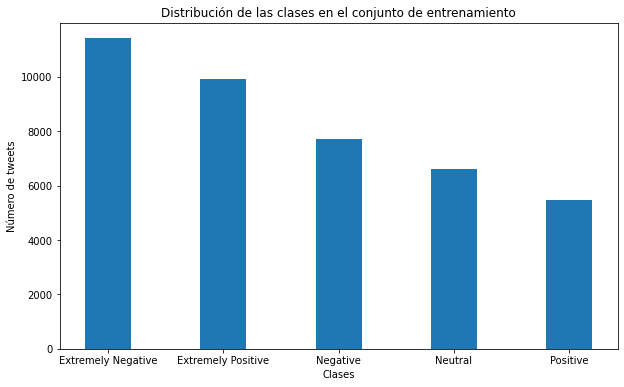

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 6))

values = counts_train.values()
LABELS=sorted(counts_train.keys())
plt.bar(LABELS, values, width = 0.4)
 
plt.xlabel("Clases")
plt.ylabel("Número de tweets")
plt.title("Distribución de las clases en el conjunto de entrenamiento")
plt.show()


## Distribución del tamaño de los textos

En las tareas de PLN, otra de las características que debemos de estudiar es cómo son los textos de entrada, y en particular, cuál es la longitud de estos textos. 

Aunque la longitud de los textos se puede considerar como conjunto de carácteres, en la mayoría de las aplicaciones, consideramos la longitud de un texto como el número de tokens que componene dicho texto. 

En las siguientes celdas, aprenderemos a estudiar esta y otras características, y a representarlas en forma de gráficos para que nos facilite la discusión sobre ellas. 


El primer paso que debemos realizar es dividir los textos en tokens. La forma más sencilla sería utilizar el método split de la clase str,

In [10]:
s = "Esta es una oración que queremos tokenizar"
s.split()

['Esta', 'es', 'una', 'oración', 'que', 'queremos', 'tokenizar']

El método split() no siempre trabaja bien para la tokenización. ¿Ves algún problema en la siguiente tokenización?

In [11]:
s = "Esta es una oración que queremos tokenizar."
s.split()

['Esta', 'es', 'una', 'oración', 'que', 'queremos', 'tokenizar.']

Más adelante en el curso veremos algunas librerías que nos permiten obtener una tokenización más correcta, pero por el momento, el método split() nos puede dar una primera aproximación.

In [12]:
tokens=df_train['Text'].apply(lambda text: text.split())

# mostramos el texto del segundo registro y su tokenización con split 
print(df_train['Text'][1])
print(tokens[1])


advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
['advice', 'Talk', 'to', 'your', 'neighbours', 'family', 'to', 'exchange', 'phone', 'numbers', 'create', 'contact', 'list', 'with', 'phone', 'numbers', 'of', 'neighbours', 'schools', 'employer', 'chemist', 'GP', 'set', 'up', 'online', 'shopping', 'accounts', 'if', 'poss', 'adequate', 'supplies', 'of', 'regular', 'meds', 'but', 'not', 'over', 'order']


Podríamos calcular directamente la longitud:

In [13]:
df_train['Length']=df_train['Text'].apply(lambda text: len(text.split()))
df_train.head()

,Text,Label,Length
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,8
1,advice Talk to your neighbours family to excha...,Positive,38
2,Coronavirus Australia: Woolworths to give elde...,Positive,14
3,My food stock is not the only one which is emp...,Positive,42
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,40


Ahora el dataset contiene una nueva columna, Length, con la longitud de cada texto. El método describe() nos permite conocer algunos datos estadísticos sobre la serie almacenada en Length. Por ejemplo, podemos ver que el tamaño medio es de 30.5 tokens, mientras que el tamaño máximo es de 64.tokens. También podemos ver que aproximadamente, el 75% de los textos tienen como máximo 40 tokens. 



In [14]:
df_train['Length'].describe()

count    41157.000000
mean        30.500304
std         11.591172
min          1.000000
25%         21.000000
50%         32.000000
75%         40.000000
max         64.000000
Name: Length, dtype: float64

Además de analizar la información proporcionada por el método describe(), es interesante construir un histograma que te permita ver visualmente la distribución de los tamaños de los textos. 

El objeto Series de Pandas ya proporciona directamente un métodos hist() para ver esta distribución de la serie:

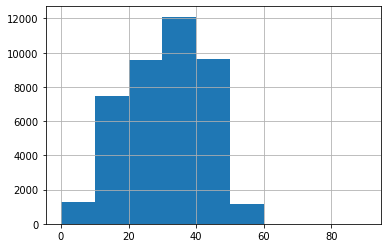

In [15]:
import numpy as np
df_train['Length'].hist(bins = np.arange(0,100,10))

Otra forma de obtener el mismo gráfico, sería 

Text(0, 0.5, 'Número de textos')

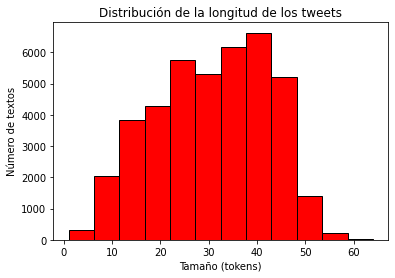

In [16]:
# Import the libraries
import matplotlib.pyplot as plt
# matplotlib histogram
plt.hist(df_train['Length'], color = 'red', edgecolor = 'black',
         bins = int(60/5))
# Add labels
plt.title('Distribución de la longitud de los tweets')
plt.xlabel('Tamaño (tokens)')
plt.ylabel('Número de textos')

Como alternativa a matplot, también podemos utilizar la librería seaborn, que es especialmente útil para este tipo de gráficos:

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


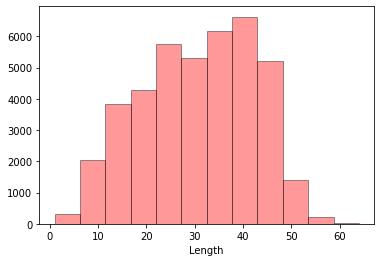

In [17]:
import seaborn as sns
sns.distplot(df_train['Length'], hist=True, kde=False, 
             bins=int(60/5), color = 'red',
             hist_kws={'edgecolor':'black'})

Podemos ver que la mayoría de los textos tienen menos de 50 tokens. 

También nos podría ser interesante conocer si los textos de una determinada clase tienen la misma longitud que los textos del resto de clases. 



/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Distribución del tamaño de los textos para cada clase')

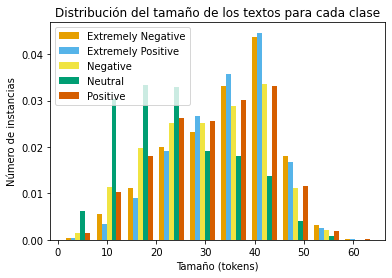

In [18]:
subsets=[]
for label in LABELS:
    subset = list(df_train[df_train['Label'] == label]['Length'])
    subsets.append(subset)

colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
plt.hist(subsets, bins = int(50/5), density=True, color = colors, label=LABELS)

# Plot formatting
plt.legend()
plt.xlabel('Tamaño (tokens)')
plt.ylabel('Número de instancias')
plt.title('Distribución del tamaño de los textos para cada clase')

Es un poco confuso. En este caso es mejor obtener un gráfico de densidad, para ello usaremos seaborn, que nos permite construirlos facilmente:

Text(0, 0.5, 'Densidad')

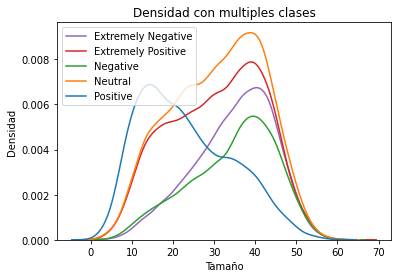

In [19]:
sns.kdeplot(data=df_train, x='Length', hue='Label')

plt.legend(LABELS)
plt.title('Densidad con multiples clases')
plt.xlabel('Tamaño')
plt.ylabel('Densidad')

Podemos ver gracias a este gráfico de densidad, que los tweets clasificados como Positivos tienden a tener una longitud más pequeña que la del resto de los tweets.
 

### Ejercicio:

Lo que se pide ahora es repetir los pasos anteriores pero para el conjunto de evaluación: 'Corona_NLP_test.csv'. En concreto se pide:
- Carga el conjunto test y visualizar los primeros registros. 
- Conserva únicamente el campo 'OriginalTweet' y 'Sentiment'. Trata de buscar otra forma alternativa para eliminar el resto de columnas. 
- Renombras dichos campos a 'Text' y 'Label'. 
- Muestra la distribución de las clases en el conjunto de evaluación
- Trata de mostrar en un único imagen la distribución del conjunto de entrenamiento y evaluación. 
- Estudia el tamaño de los textos en el conjunto de evaluación. Crea un histograma para mostrar la distribución, y un gráfico de densidad para distinguir la distribución según la clase, tal y como se ha hecho con el conjunto de entrenamiento. Compara los gráficos con los obtenidos para el conjunto de entrenamiento. 


In [ ]:
df_test = pd.read_csv(PATH+"Corona_NLP_test.csv", encoding='latin-1') 
df_test.head(2)

## Codificación de las clases

En este dataset las clases son cadenas de textos, sin embargo, para trabajar con modelos de aprendizaje automático y profudno, lo recomendable es que estas clases sean codificadas como números. 
Por tanto, lo que vamos a hacer es transformarlas en números. Por ejemplo: 

- 'Extremely Negative' -> 0
- 'Extremely Positive'-> 1
- 'Negative' -> 2
- 'Neutral' -> 3
- 'Positive' -> 4



Para ellos utilizaremos las clase LabelEncoder de la librería sklearn, que es una de las librerías de Python más populares para entrenar modelos de aprendizaje automático. 


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y = df_train['Label'].tolist()
y = le.fit_transform(Y)

Vamos a verificar si las codificadiones se han realizado correctamente:

In [28]:
print(Y[:15])
print(y[:15])

['Neutral', 'Positive', 'Positive', 'Positive', 'Extremely Negative', 'Positive', 'Positive', 'Neutral', 'Positive', 'Negative', 'Neutral', 'Extremely Positive', 'Extremely Positive', 'Positive', 'Positive']
[3 4 4 4 0 4 4 3 4 2 3 1 1 4 4]



El objeto LabelEncoder ya ha sido entrenado sobre el conjunto de entrenamiento, ahora simplemente tenemos que aplicarlo sobre las labels del conjunto de evaluación:

In [ ]:
y_test = le.transform(df_test['Label'].tolist())
# verificamos también que la transformación se ha hecho de forma correcta
print(df_test['Label'][:15].tolist())
print(y_test[:15])

## Conjunto de validación

Para entrenar un modelo de aprendizaje profundo y poder ajustar sus parámetros, es necesario contar con un conjunto de validación. Algunos datasets  proporcionan los tres subconjuntos (training, validation y test), sin embargo, en nuestro caso, únicamente se han proporcioando el conjunto de entreamiento y el de test. En la siguiente celda construiremos el conjutno de validación, tomando el 20% del conjunto de entrenammiento. 


Para obtenerlo podemos usar el método 'train_test_split' de la librería sklearn. 


In [30]:
from sklearn.model_selection import train_test_split

X=df_train['Text'].tolist()
X_train, X_val, y_train, y_val = train_test_split(X, y, 
        test_size=0.20, random_state=42, stratify=y)  #with random_state, we always obtain the same partition

print("Tamaño del conjunto de entrenamiento: ", len(X_train))
assert len(X_train) == len(y_train)
print("Tamaño del conjunto de validación: ", len(X_val))
assert len(X_val) == len(y_val)

X_test=df_test['Text'].tolist()
print("Tamaño del conjunto de evaluación: ", len(X_test))
assert len(X_test) == len(y_test)

Tamaño del conjunto de entrenamiento:  32925
Tamaño del conjunto de validación:  8232
Tamaño del conjunto de evaluación:  3798


Los parámetros stratify y random_state son muy importantes. Con el primero conseguimos que ambas particiones tengan la misma distribución de clases que en el original (y). Respecto a random_state, este nos permite obtener siempre las mismas particiones. De esta forma, nos aseguramos que cualquier que quiera repetir nuestra experimentación lo esté haciendo exactamente con el mismo conjunto de datos que nosotros hemos utilizado. 

Vamos a mostrar varios ejemplos:

In [31]:
print("Text: ", X_train[2], " Label: ", y_train[2]) 
# it must always be: 
# Tweet:  Watch this if you are one of those idiots who is panic buying food. #thinkofothers #Coronavirus : Nurse's despair as panic-buyers clear shelves https://t.co/L9aNBZjteN  Label:  0

print("\nText: ", X_val[0], " Label: ", y_val[0]) 
# it must always be: 
#Tweet:  Meanwhile a villager of quenching her thirsty in a supermarket somewhere in Africa  19 naka g  Label:  3


Text:  Watch this if you are one of those idiots who is panic buying food. #thinkofothers #Coronavirus : Nurse's despair as panic-buyers clear shelves https://t.co/L9aNBZjteN  Label:  0

Text:  Meanwhile a villager of quenching her thirsty in a supermarket somewhere in Africa  19 naka g  Label:  3


### Ejercicio: 
Construye un gráfico que muestre la distribución de las clases en los tres subconjuntos del dataset.